In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from scipy.linalg import expm, cosm

In [4]:
-expm(1.0j*np.pi*np.eye(2))

array([[ 1.-1.2246468e-16j, -0.-0.0000000e+00j],
       [-0.-0.0000000e+00j,  1.-1.2246468e-16j]])

In [24]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=3)  # 2 ancilla + 1 system

def prepare_equal_superposition():
    """Prepare uniform superposition over 4 states: |00>, |01>, |10>, |11>"""
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)

def select_four_evolutions():
    """Apply:
    - e^{-2iH} on |00>
    - e^{-iH}  on |01>
    - e^{+iH}  on |10>
    - e^{+2iH} on |11>
    """
    sys = 2
    # |00⟩ → e^{-2iZ}
    qml.ctrl(qml.RZ, control=[0], control_values=0)(-2.0, wires=sys)

    # |01⟩ → e^{-iZ}

    qml.ctrl(qml.RZ, control=[0], control_values=1)(2.0, wires=sys)


    # |10⟩ → e^{+iZ}

    qml.ctrl(qml.RZ, control=[1], control_values=0)(-2.0, wires=sys)


    # |11⟩ → e^{+2iZ}

    qml.ctrl(qml.RZ, control=[1], control_values=1)(2.0, wires=sys)


@qml.qnode(dev)
def four_term_circuit():
    prepare_equal_superposition()
    select_four_evolutions()
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    return qml.state()

U = qml.matrix(four_term_circuit)()

# extract top-left 2x2 block where ancilla in |00⟩
def extract_U_on_system_given_ancilla00(U):
    #return U[np.ix_([0,1],[0,1])]
    return U[:2, :2]

U_eff = extract_U_on_system_given_ancilla00(U)

# build target operator: (e^{-2iZ} + e^{-iZ} + e^{iZ} + e^{2iZ}) / 4
Z = np.array([[1,0],[0,-1]])
target = (
    scipy.linalg.expm(-2j*Z)
    + np.eye(2) +
    np.eye(2) +
    scipy.linalg.expm(2j*Z)
) / 4

error = np.linalg.norm(U_eff - target)

print("Circuit effective operator:\n", U_eff)
print("\nTarget operator:\n", target)
print(f"\nOperator error norm: {error:.3e}")


Circuit effective operator:
 [[0.29192658-3.65441562e-17j 0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j 0.29192658+3.65441562e-17j]]

Target operator:
 [[0.29192658+0.j 0.        +0.j]
 [0.        +0.j 0.29192658+0.j]]

Operator error norm: 9.399e-17


(<Figure size 900x400 with 1 Axes>, <Axes: >)

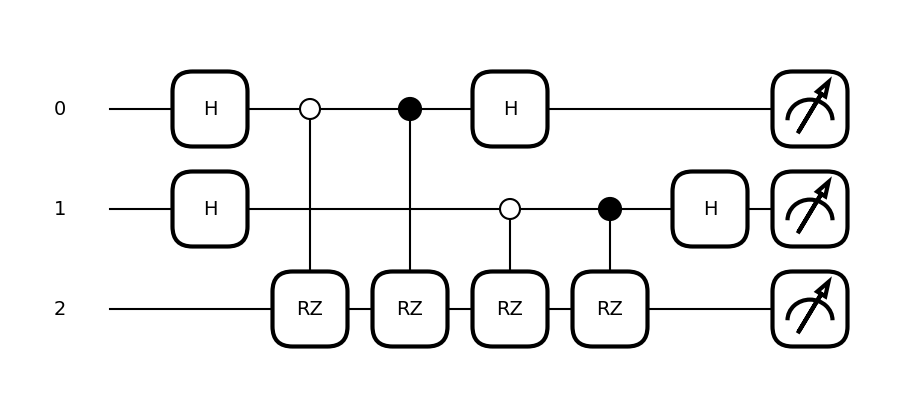

In [11]:
qml.draw_mpl(four_term_circuit)()

(<Figure size 900x400 with 1 Axes>, <Axes: >)

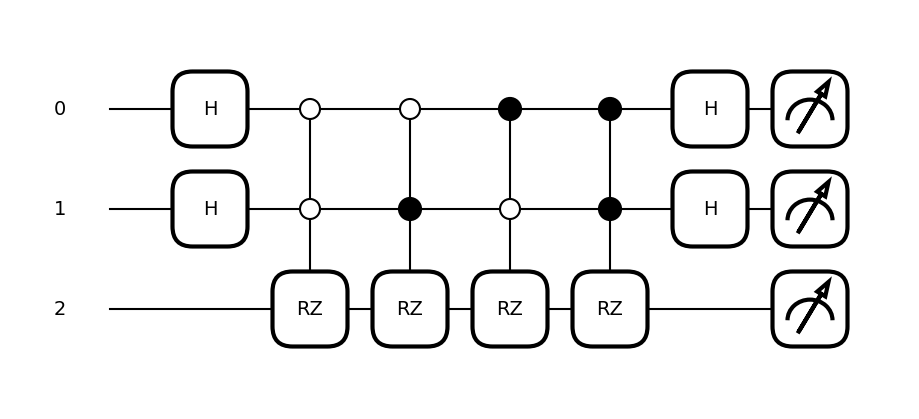

In [28]:
def lcu_circuit():
    sys = 2
    # |00⟩ → e^{-2iZ}
    qml.ctrl(qml.RZ, control=[0, 1], control_values=[0, 0])(-4.0, wires=sys)

    # |01⟩ → e^{-iZ}

    qml.ctrl(qml.RZ, control=[0, 1], control_values=[0, 1])(0, wires=sys)


    # |10⟩ → e^{+iZ}

    qml.ctrl(qml.RZ, control=[0, 1], control_values=[1, 0])(0, wires=sys)


    # |11⟩ → e^{+2iZ}

    qml.ctrl(qml.RZ, control=[0, 1], control_values=[1, 1])(4.0, wires=sys)
@qml.qnode(dev)
def four_term_circuit():
    prepare_equal_superposition()
    lcu_circuit()
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    return qml.state()

qml.draw_mpl(four_term_circuit)()

In [32]:
qml.matrix(four_term_circuit)()[:2,:2]

array([[0.29192658+2.70815529e-18j, 0.        +0.00000000e+00j],
       [0.        +0.00000000e+00j, 0.29192658-2.70815529e-18j]])